In [10]:
# Imports

import sys
print(sys.version_info)

try:
    import numpy as np
    import pandas as pd
    import skfuzzy as fuzz
    import matplotlib.pyplot as plt
    from skfuzzy import control as ctrl
    from deap import base, creator, tools, algorithms
    from sklearn.metrics import mean_absolute_error
    from random import choice, uniform  
    from sklearn.model_selection import train_test_split
except:
    %pip install -U numpy matplotlib scikit-fuzzy
    %pip install deap

sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


In [11]:
# Load the first 100 rows of the dataset
data = pd.read_csv('winequality-white.csv', sep=';').iloc[:100]

# Split the data into features (X) and target (Y)
X = data[['alcohol', 'fixed acidity', 'free sulfur dioxide', 'residual sugar', 'volatile acidity']]
Y = data['quality']

# Split into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 60
Validation set size: 20
Test set size: 20


In [12]:
# Function to generate triangular membership sets

def extract_key_values(x):
    MIN = min(x)
    MAX = max(x)
    
    a = 1.5  
    b = 0.5
    c = 0.5
    
    q1 = np.quantile(x, 0.25)
    q2 = np.quantile(x, 0.50)  
    q3 = np.quantile(x, 0.75)
    
    LL = max(MIN, q1 - a * (q3 - q1))
    HL = min(MAX, q3 + a * (q3 - q1))
    
    v1 = c * (LL - MIN)
    v2 = c * (MAX - HL)
    
    # Define triangular membership functions (three points each)
    ol = [MIN, MIN, LL]         
    low = [MIN, q1, q2]         
    normal = [q1, q2, q3]       
    high = [q2, q3, HL]         
    oh = [HL, MAX, MAX]         
    
    return ol, low, normal, high, oh, MIN, MAX


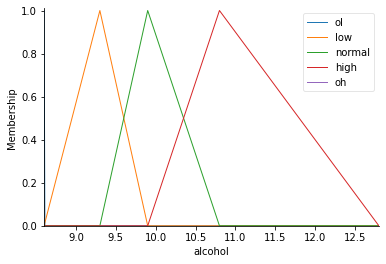

In [13]:
# Define fuzzy sets for alcohol
ol_alcohol, low_alcohol, normal_alcohol, high_alcohol, oh_alcohol, alcohol_min, alcohol_max = extract_key_values(X.iloc[:, 0])
alcohol = ctrl.Antecedent(np.arange(alcohol_min, alcohol_max, 0.01), 'alcohol')

alcohol['ol'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), ol_alcohol)
alcohol['low'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), low_alcohol)
alcohol['normal'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), normal_alcohol)
alcohol['high'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), high_alcohol)
alcohol['oh'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), oh_alcohol)

alcohol.view()  

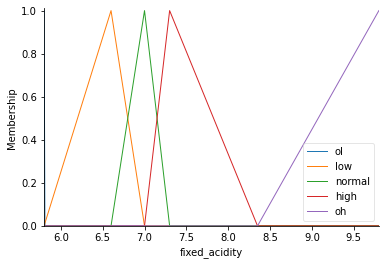

In [14]:
# Define fuzzy sets for fixed acidity
ol_fixed_acidity, low_fixed_acidity, normal_fixed_acidity, high_fixed_acidity, oh_fixed_acidity, fixed_acidity_min, fixed_acidity_max = extract_key_values(X.iloc[:, 1])
fixed_acidity = ctrl.Antecedent(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), 'fixed_acidity')

fixed_acidity['ol'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), ol_fixed_acidity)
fixed_acidity['low'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), low_fixed_acidity)
fixed_acidity['normal'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), normal_fixed_acidity)
fixed_acidity['high'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), high_fixed_acidity)
fixed_acidity['oh'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), oh_fixed_acidity)

fixed_acidity.view()


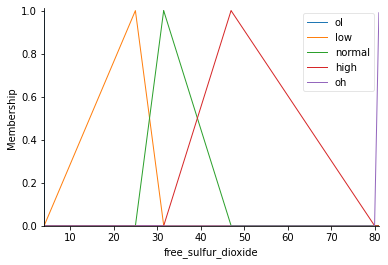

In [15]:
# Define fuzzy sets for free sulfur dioxide
ol_free_sulfur_dioxide, low_free_sulfur_dioxide, normal_free_sulfur_dioxide, high_free_sulfur_dioxide, oh_free_sulfur_dioxide, free_sulfur_dioxide_min, free_sulfur_dioxide_max = extract_key_values(X.iloc[:, 2])
free_sulfur_dioxide = ctrl.Antecedent(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), 'free_sulfur_dioxide')

free_sulfur_dioxide['ol'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), ol_free_sulfur_dioxide)
free_sulfur_dioxide['low'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), low_free_sulfur_dioxide)
free_sulfur_dioxide['normal'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), normal_free_sulfur_dioxide)
free_sulfur_dioxide['high'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), high_free_sulfur_dioxide)
free_sulfur_dioxide['oh'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), oh_free_sulfur_dioxide)

free_sulfur_dioxide.view()

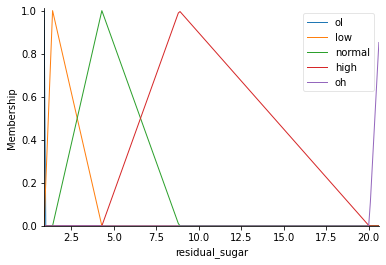

In [16]:
# Define fuzzy sets for Residual Sugar
ol_sugar, low_sugar, normal_sugar, high_sugar, oh_sugar, sugar_min, sugar_max = extract_key_values(X.iloc[:, 3])
sugar = ctrl.Antecedent(np.arange(sugar_min, sugar_max, 0.1), 'residual_sugar')

sugar['ol'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), ol_sugar)
sugar['low'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), low_sugar)
sugar['normal'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), normal_sugar)
sugar['high'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), high_sugar)
sugar['oh'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), oh_sugar)

sugar.view()  

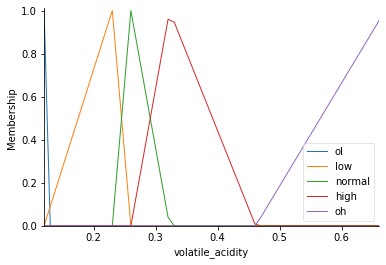

In [17]:
# Define fuzzy sets for volatile acidity
ol_volatile_acidity, low_volatile_acidity, normal_volatile_acidity, high_volatile_acidity, oh_volatile_acidity, volatile_acidity_min, volatile_acidity_max = extract_key_values(X.iloc[:, 4])
volatile_acidity = ctrl.Antecedent(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), 'volatile_acidity')

volatile_acidity['ol'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), ol_volatile_acidity)
volatile_acidity['low'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), low_volatile_acidity)
volatile_acidity['normal'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), normal_volatile_acidity)
volatile_acidity['high'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), high_volatile_acidity)
volatile_acidity['oh'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), oh_volatile_acidity)

volatile_acidity.view()

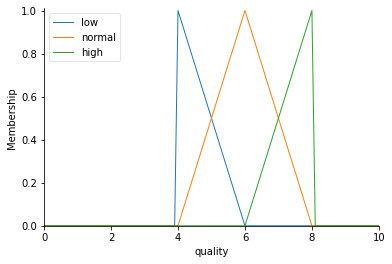

In [18]:
# Define the output variable: wine quality
quality = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'quality')  

min_quality = min(Y)
max_quality = max(Y)

quality['low'] = fuzz.trimf(quality.universe, [min_quality, min_quality, 6])      
quality['normal'] = fuzz.trimf(quality.universe, [min_quality, 6, max_quality])   
quality['high'] = fuzz.trimf(quality.universe, [6, max_quality, max_quality])   

quality.view()


In [19]:
# Initialize control system
rule_list = [] 
system = ctrl.ControlSystem(rule_list)
simulator = ctrl.ControlSystemSimulation(system)

# GA Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
n_rules = 100

toolbox = base.Toolbox()
toolbox.register("attr_rule", lambda: [choice(['ol', 'low', 'normal', 'high', 'oh']) for _ in range(5)] + [choice(['low', 'normal', 'high'])]) # random initial rules
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_rule, n=n_rules)  
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# Evaluate Function
def evaluate(individual):
    global rule_list, system, simulator

    # Clear current rules
    rule_list.clear()
    for gene in individual:
        # Define a rule for each gene
        rule = ctrl.Rule(
            alcohol[gene[0]] & fixed_acidity[gene[1]] &
            free_sulfur_dioxide[gene[2]] & sugar[gene[3]] &
            volatile_acidity[gene[4]], quality[gene[5]]
        )

        rule_list.append(rule)
    
    # Update control system
    system = ctrl.ControlSystem(rule_list)
    simulator = ctrl.ControlSystemSimulation(system)
    
    # Preallocate predictions as a NumPy array
    predictions = np.zeros(len(X)) 
    
    for i, row in X.iterrows():
        # Pass inputs
        simulator.input['alcohol'] = row['alcohol']
        simulator.input['fixed_acidity'] = row['fixed acidity']
        simulator.input['free_sulfur_dioxide'] = row['free sulfur dioxide']
        simulator.input['residual_sugar'] = row['residual sugar']
        simulator.input['volatile_acidity'] = row['volatile acidity']
        
        # Compute the output quality
        try:
            simulator.compute()
            predictions[i] = simulator.output['quality']  
        except Exception as e:
            predictions[i] = 0  
    
    # Calculate MAE as fitness
    mae = mean_absolute_error(Y, predictions)
    return (mae,)



toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm Execution
population = toolbox.population(n=50)
NGEN = 20
CXPB = 0.7
MUTPB = 0.1

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    
best_individual = tools.selBest(population, k=1)[0]
print("Best individual:", best_individual)


Best individual: [['normal', 'low', 'high', 'high', 'normal', 'high'], ['oh', 'low', 'high', 'ol', 'normal', 'normal'], ['low', 'normal', 'high', 'low', 'ol', 'low'], ['low', 'high', 'ol', 'high', 'normal', 'low'], ['low', 'low', 'normal', 'low', 'ol', 'high'], ['normal', 'oh', 'low', 'high', 'normal', 'normal'], ['normal', 'ol', 'normal', 'high', 'normal', 'low'], ['ol', 'high', 'oh', 'ol', 'low', 'low'], ['normal', 'ol', 'oh', 'high', 'high', 'normal'], ['high', 'normal', 'high', 'ol', 'normal', 'high'], ['normal', 'oh', 'oh', 'normal', 'low', 'low'], ['high', 'normal', 'normal', 'oh', 'oh', 'low'], ['high', 'low', 'normal', 'low', 'normal', 'normal'], ['ol', 'high', 'low', 'low', 'normal', 'high'], ['high', 'low', 'normal', 'normal', 'low', 'high'], ['normal', 'low', 'low', 'normal', 'high', 'normal'], ['oh', 'high', 'ol', 'oh', 'oh', 'high'], ['ol', 'high', 'normal', 'high', 'low', 'low'], ['high', 'ol', 'low', 'ol', 'ol', 'high'], ['ol', 'high', 'low', 'oh', 'low', 'normal'], ['hi

In [20]:
# Evaluate MAE on the training set using the optimized rules

rule_list.clear()  
for gene in best_individual:
    # Define a rule for each gene
    rule = ctrl.Rule(
        alcohol[gene[0]] & fixed_acidity[gene[1]] &
        free_sulfur_dioxide[gene[2]] & sugar[gene[3]] &
        volatile_acidity[gene[4]], quality[gene[5]]
    )
    rule_list.append(rule)

# Update control system with optimized rules
system = ctrl.ControlSystem(rule_list)
optimized_simulator = ctrl.ControlSystemSimulation(system)

# Preallocate predictions for the training set
train_predictions = np.zeros(len(X_train))  # Preallocate with zeros

# Predictions for training set
for i, (_, row) in enumerate(X_train.iterrows()):
    optimized_simulator.input['alcohol'] = row['alcohol']
    optimized_simulator.input['fixed_acidity'] = row['fixed acidity']
    optimized_simulator.input['free_sulfur_dioxide'] = row['free sulfur dioxide']
    optimized_simulator.input['residual_sugar'] = row['residual sugar']
    optimized_simulator.input['volatile_acidity'] = row['volatile acidity']

    # Compute the output quality
    try:
        optimized_simulator.compute()
        train_predictions[i] = optimized_simulator.output['quality']  # Directly assign value
    except Exception as e:
        train_predictions[i] = 0  # Assign a default value directly

# Calculate the MAE for the training set
train_mae = mean_absolute_error(Y_train, train_predictions)
print("Training MAE: {:.2f}".format(train_mae))

Training MAE: 3.18


In [22]:
# Validate the best individual on the validation set
rule_list.clear()  
for gene in best_individual:
    rule = ctrl.Rule(
        alcohol[gene[0]] & fixed_acidity[gene[1]] &
        free_sulfur_dioxide[gene[2]] & sugar[gene[3]] &
        volatile_acidity[gene[4]], quality[gene[5]]
    )
    rule_list.append(rule)

# Update control system with the best individual
system = ctrl.ControlSystem(rule_list)
simulator = ctrl.ControlSystemSimulation(system)

# Preallocate predictions for the validation set
predictions_val = np.zeros(len(X_val))  # Preallocate with zeros

# Evaluate on the validation dataset
for i, (_, row) in enumerate(X_val.iterrows()):
    simulator.input['alcohol'] = row['alcohol']
    simulator.input['fixed_acidity'] = row['fixed acidity']
    simulator.input['free_sulfur_dioxide'] = row['free sulfur dioxide']
    simulator.input['residual_sugar'] = row['residual sugar']
    simulator.input['volatile_acidity'] = row['volatile acidity']
    
    try:
        simulator.compute()
        predictions_val[i] = simulator.output['quality']  # Directly assign value
    except Exception as e:
        predictions_val[i] = 0  # Default value in case of error

# Calculate MAE for validation
val_mae = mean_absolute_error(Y_val, predictions_val)
print("Validation MAE: {:.2f}".format(val_mae))

Validation MAE: 2.53


In [23]:
# Use the best individual to make predictions on the test set
rule_list.clear()  
for gene in best_individual:
    rule = ctrl.Rule(
        alcohol[gene[0]] & fixed_acidity[gene[1]] &
        free_sulfur_dioxide[gene[2]] & sugar[gene[3]] &
        volatile_acidity[gene[4]], quality[gene[5]]
    )
    rule_list.append(rule)

# Update control system with the best individual for testing
system = ctrl.ControlSystem(rule_list)
simulator = ctrl.ControlSystemSimulation(system)

# Preallocate predictions for the test set
predictions_test = np.zeros(len(X_test))  # Preallocate with zeros

# Evaluate on the test dataset
for i, (_, row) in enumerate(X_test.iterrows()):
    simulator.input['alcohol'] = row['alcohol']
    simulator.input['fixed_acidity'] = row['fixed acidity']
    simulator.input['free_sulfur_dioxide'] = row['free sulfur dioxide']
    simulator.input['residual_sugar'] = row['residual sugar']
    simulator.input['volatile_acidity'] = row['volatile acidity']
    
    try:
        simulator.compute()
        predictions_test[i] = simulator.output['quality']  # Directly assign value
    except Exception as e:
        predictions_test[i] = 0  # Default value in case of error

# Calculate MAE for test
test_mae = mean_absolute_error(Y_test, predictions_test)
print("Test MAE: {:.2f}".format(test_mae))

Test MAE: 3.14


In [24]:
# Clear any previous rules
rule_list = []

# Preallocate the list for rules based on the number of genes
num_genes = len(best_individual)
rule_list = [None] * num_genes  # Preallocate a list of the appropriate size

# Create fuzzy rules based on the optimized rule set (best individual)
for i, gene in enumerate(best_individual):
    rule_list[i] = ctrl.Rule(
        alcohol[gene[0]] & fixed_acidity[gene[1]] &
        free_sulfur_dioxide[gene[2]] & sugar[gene[3]] &
        volatile_acidity[gene[4]], quality[gene[5]]
    )

# Update control system
optimized_system = ctrl.ControlSystem(rule_list)
optimized_simulator = ctrl.ControlSystemSimulation(optimized_system)

alcohol                10.20
fixed acidity           8.30
free sulfur dioxide     7.00
residual sugar          1.10
volatile acidity        0.14
Name: 31, dtype: float64 

Predicted Quality: 4.93
Actual Quality: 6.00


c:\FIA\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


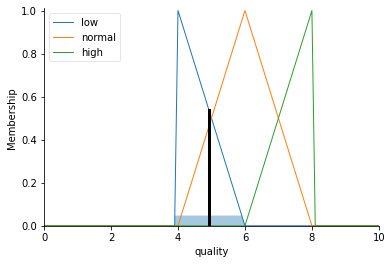

In [25]:
## Example

sample_index = 0
sample = X_test.iloc[sample_index]
print(sample, "\n")

# Set the inputs for the optimized simulator
optimized_simulator.input['alcohol'] = sample['alcohol']
optimized_simulator.input['fixed_acidity'] = sample['fixed acidity']
optimized_simulator.input['free_sulfur_dioxide'] = sample['free sulfur dioxide']
optimized_simulator.input['residual_sugar'] = sample['residual sugar']
optimized_simulator.input['volatile_acidity'] = sample['volatile acidity']

# Run the simulation
optimized_simulator.compute()

# Print the predicted quality
try:
    predicted_quality = optimized_simulator.output['quality']
    print("Predicted Quality: {:.2f}".format(predicted_quality))
except KeyError:
    print("ERROR: Quality output not available for the provided input!")

# Print the actual quality using the correct index from Y_test
actual_quality = Y_test.iloc[sample_index]
print("Actual Quality: {:.2f}".format(actual_quality))


quality.view(sim=optimized_simulator)